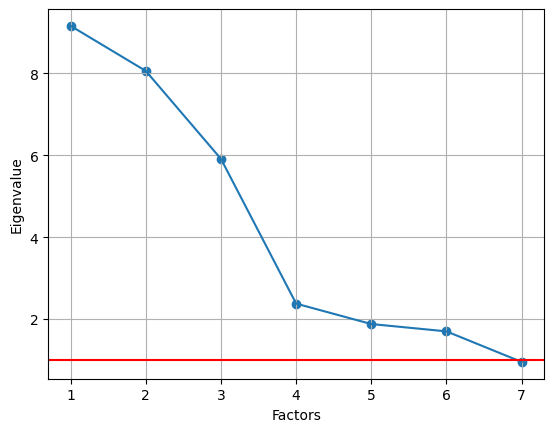

In [48]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\train_pKa_v3.csv', index_col=0)
test_df = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\test_pKa_v3.csv', index_col=0)

merged_dataframe = pd.concat([train_df, test_df], axis=0)

features_to_analyse = []
for feature_name in merged_dataframe.columns:
    if len(merged_dataframe[feature_name].unique()) != 1:
        features_to_analyse.append(feature_name)
features_to_analyse.remove('fold_id')

fa = FactorAnalyzer(rotation=None)

df_features = merged_dataframe[features_to_analyse]
df_features_darray = StandardScaler().fit_transform(df_features)
fa.fit(df_features_darray)

ev, _ = fa.get_eigenvalues()
for index, en_value in enumerate(ev):
    if en_value < 1:
        break
index += 1


plt.scatter(range(1, index + 1), ev[:index])
plt.plot(range(1, index + 1), ev[:index])
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color='r')
plt.grid()
plt.show()

In [50]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_features)
kmo_model

0.6170582471361054

In [53]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df_features_darray)
print(f"statistics: {chi_square_value}, p-value: {p_value}")

statistics: 38494.836001859905, p-value: 0.0


In [62]:
from sklearn.preprocessing import StandardScaler

n_factors = 10

fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")

fa.fit(df_features)

fa_load = pd.DataFrame(fa.loadings_,index=df_features.columns)
fa_load.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4,5,6,7,8,9
avg_atoms_in_cycle,0.072657,0.442973,-0.100632,-0.110998,0.157561,0.592867,-0.094072,0.232403,-0.298997,-0.056621
chirality,-0.113131,0.061226,0.074770,-0.027857,-0.074617,-0.059901,0.933958,0.082940,-0.019103,0.037010
PPSA5,-0.855027,0.079691,-0.043042,0.325897,-0.011893,0.160960,0.043847,-0.057206,0.128841,0.165662
RPCS,0.279696,-0.221471,0.000410,-0.633843,0.056349,-0.026449,0.039526,-0.006731,-0.009798,-0.049690
mol_num_cycles,-0.000741,0.106837,0.806782,-0.081025,0.129017,0.175369,0.059342,0.496192,0.063589,0.002614
GeomShapeIndex,-0.464274,-0.007594,-0.045780,0.107511,-0.197372,-0.039950,0.007306,0.036253,0.674658,0.024382
angle_R2X2R1,-0.036205,0.977861,-0.033054,0.150115,-0.046305,0.061609,0.025841,0.037832,-0.009345,0.010503
nN,0.976943,0.070381,0.027587,-0.002116,0.091577,-0.094477,-0.042810,-0.028264,-0.048739,0.062412
distance_between_atoms_in_f_group_centers,0.152161,0.756923,0.018945,0.171666,0.122689,0.112879,0.034862,0.053461,0.082293,0.004542
nC,-0.245789,0.138601,0.567937,0.015935,-0.093284,0.758545,-0.077957,0.045971,0.019731,0.031542


In [59]:
explained_variance = fa.get_factor_variance()

variance_per_factor = explained_variance[0]

proportional_variance = explained_variance[1]

cumulative_variance = explained_variance[2]

print("Variance Per Factor:", variance_per_factor)
print("Propartional Variance:", proportional_variance)
print("Cumulative Variance:", cumulative_variance)


Variance Per Factor: [7.11999085 6.97609201 6.04598156 2.08434941 1.83410447 1.68433886
 1.25362255 1.18464692 1.10113679 0.96852283 0.88805514 0.68978414
 0.43648361 0.33885949 0.30988043 0.23886904 0.21814968 0.10816704
 0.09387554 0.06436805]
Propartional Variance: [0.20342831 0.19931691 0.17274233 0.05955284 0.05240298 0.04812397
 0.03581779 0.03384705 0.03146105 0.02767208 0.025373   0.01970812
 0.01247096 0.0096817  0.00885373 0.00682483 0.00623285 0.00309049
 0.00268216 0.00183909]
Cumulative Variance: [0.20342831 0.40274522 0.57548756 0.6350404  0.68744338 0.73556735
 0.77138514 0.80523219 0.83669324 0.86436532 0.88973833 0.90944644
 0.9219174  0.9315991  0.94045283 0.94727766 0.95351051 0.956601
 0.95928315 0.96112224]


-------------------------------------------

**ONLY AMINES**

In [8]:
import os
import sys
sys.path.insert(0, os.path.dirname('C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part'))

import pandas as pd

from ml_part.random_forest.data_prep.preparation import DataPreparation
from ml_part.random_forest.train import RFTrain

CSV_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_pKa_01.02_v2.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

unimportant_features_to_drop = ['logP']
X, y = dataPreparation.prepare_data_for_RF(is_pKa=True,
                                           molecule_type="amine",
                                           use_mandatory_features=True,
                                           is_remove_outliers=True,
                                           is_remove_nan=False,
                                           outliers_features_to_skip=unimportant_features_to_drop,)

correlated_features = ['f_atom_fraction', 'naHRing', 'nFaRing', 'nFaHRing', 'tpsa+f']
features_to_drop = []
for feature_name in X.columns:
    if feature_name in correlated_features:
        features_to_drop.append(feature_name)

X = X.drop(features_to_drop, axis=1)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath,
                   is_pKa=True,
                   k_folds=2)

y_train = rf_train.y_train
X_train = rf_train.X_train

y_test = rf_train.y_test
X_test = rf_train.X_test

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(len(train_df), len(test_df))

True
128
['avg_atoms_in_cycle', 'nFaHRing', 'chirality', 'PPSA5', 'tpsa+f', 'RPCS', 'mol_num_cycles', 'GeomShapeIndex', 'angle_R2X2R1', 'nN', 'distance_between_atoms_in_f_group_centers', 'nC', 'nFARing', 'angle_R1X1R2', 'f_freedom', 'naHRing', 'nFAHRing', 'cis/trans', 'dipole_moment', 'f_to_fg', 'identificator', 'f_atom_fraction', 'nFRing', 'nFaRing', 'naRing', 'nFHRing', 'PBF', 'nARing', 'nF', 'dihedral_angle', 'nAHRing', 'nO', 'TASA', 'angle_X2X1R1', 'mol_volume', 'FPSA3', 'PNSA5', 'angle_X1X2R2', 'nHRing', 'pKa', 'logP']
dipole_moment outliers indexes: [27]
f_atom_fraction outliers indexes: [69]
mol_volume outliers indexes: [72]
Remains rows:121, amount of features: 41
102 19


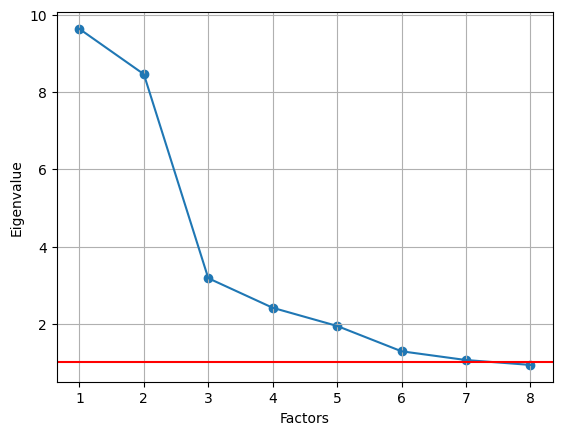

In [9]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

merged_dataframe = pd.concat([train_df, test_df], axis=0)

features_to_analyse = []
for feature_name in merged_dataframe.columns:
    if len(merged_dataframe[feature_name].unique()) != 1:
        features_to_analyse.append(feature_name)
features_to_analyse.remove('fold_id')

fa = FactorAnalyzer(rotation=None)

df_features = merged_dataframe[features_to_analyse]
df_features_darray = StandardScaler().fit_transform(df_features)
fa.fit(df_features_darray)

ev, _ = fa.get_eigenvalues()
for index, en_value in enumerate(ev):
    if en_value < 1:
        break
index += 1


plt.scatter(range(1, index + 1), ev[:index])
plt.plot(range(1, index + 1), ev[:index])
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color='r')
plt.grid()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

n_factors = 10

fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")

fa.fit(df_features)

fa_load = pd.DataFrame(fa.loadings_,index=df_features.columns)
fa_load.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4,5,6,7,8,9
avg_atoms_in_cycle,-0.078836,0.524543,-0.055994,0.184475,0.346122,-0.036483,0.570933,0.013806,0.180370,0.246296
chirality,0.019861,0.063101,0.032995,-0.108273,-0.057310,0.928083,0.030840,-0.023642,-0.015018,0.044683
PPSA5,-0.062575,0.217577,0.815324,-0.010474,0.146591,0.005274,-0.117246,0.132634,0.304885,-0.092935
RPCS,-0.039769,-0.215547,-0.752791,0.104953,-0.025749,0.144220,-0.019283,0.063259,0.189127,-0.042649
mol_num_cycles,0.835149,0.121961,-0.115605,0.212833,0.173344,0.076669,-0.001462,-0.032514,-0.035670,0.416296
GeomShapeIndex,-0.095333,-0.015068,0.185425,-0.252054,0.034364,-0.034741,-0.744446,-0.011390,0.040065,0.052200
angle_R2X2R1,-0.018212,0.932093,0.322145,0.002006,-0.018583,0.045751,0.056914,0.003110,0.016587,0.049164
distance_between_atoms_in_f_group_centers,0.026176,0.769099,0.241092,0.142906,0.124778,0.041685,-0.121943,0.042499,0.019684,0.026806
nC,0.717981,0.227135,0.011130,-0.040559,0.499066,-0.113319,0.209852,0.031845,0.327524,0.065675
nFARing,0.932538,-0.101232,-0.036207,0.175057,0.056397,0.085889,-0.052380,0.071479,-0.056281,-0.080664


-------------------------------------------

ONLY ACIDS

In [2]:
import os
import sys
sys.path.insert(0, os.path.dirname('C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part'))

import pandas as pd

from ml_part.random_forest.data_prep.preparation import DataPreparation
from ml_part.random_forest.train import RFTrain

CSV_PATH = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_pKa_01.02_v2.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

dataPreparation = DataPreparation(CSV_PATH)

unimportant_features_to_drop = ['logP', 'RPCS']
X, y = dataPreparation.prepare_data_for_RF(is_pKa=True,
                                           molecule_type="acid",
                                           use_mandatory_features=True,
                                           is_remove_outliers=True,
                                           is_remove_nan=False,
                                           outliers_features_to_skip=unimportant_features_to_drop,)

correlated_features = ['f_atom_fraction', 'naHRing', 'nFaRing', 'nFaHRing', 'tpsa+f']
features_to_drop = []
for feature_name in X.columns:
    if feature_name in correlated_features:
        features_to_drop.append(feature_name)

X = X.drop(features_to_drop, axis=1)

rf_train = RFTrain(X=X, 
                   y=y,
                   smiles_filepath=smiles_filepath,
                   is_pKa=True,
                   k_folds=2)

y_train = rf_train.y_train
X_train = rf_train.X_train

y_test = rf_train.y_test
X_test = rf_train.X_test

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(len(train_df), len(test_df))

True
55
['avg_atoms_in_cycle', 'nFaHRing', 'chirality', 'PPSA5', 'tpsa+f', 'RPCS', 'mol_num_cycles', 'GeomShapeIndex', 'angle_R2X2R1', 'nN', 'distance_between_atoms_in_f_group_centers', 'nC', 'nFARing', 'angle_R1X1R2', 'f_freedom', 'naHRing', 'nFAHRing', 'cis/trans', 'dipole_moment', 'f_to_fg', 'identificator', 'f_atom_fraction', 'nFRing', 'nFaRing', 'naRing', 'nFHRing', 'PBF', 'nARing', 'nF', 'dihedral_angle', 'nAHRing', 'nO', 'TASA', 'angle_X2X1R1', 'mol_volume', 'FPSA3', 'PNSA5', 'angle_X1X2R2', 'nHRing', 'pKa', 'logP']
PPSA5 outliers indexes: [39, 40]
GeomShapeIndex outliers indexes: [50]
distance_between_atoms_in_f_group_centers outliers indexes: [35]
PBF outliers indexes: [40]
FPSA3 outliers indexes: [40]
Remains rows:50, amount of features: 41
43 7


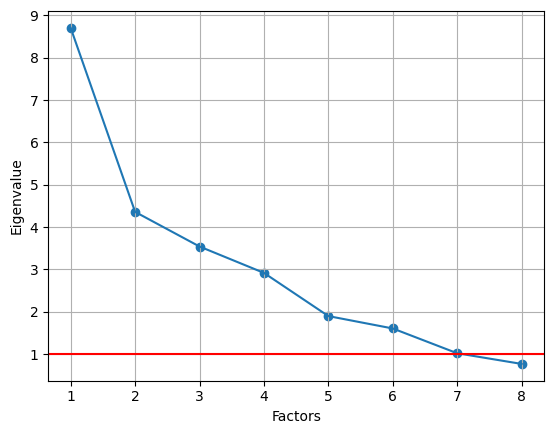

In [79]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

merged_dataframe = pd.concat([train_df, test_df], axis=0)

features_to_analyse = []
features_to_drop = []
for feature_name in merged_dataframe.columns:
    if len(merged_dataframe[feature_name].unique()) > 1:
        features_to_analyse.append(feature_name)
    if len(merged_dataframe[feature_name].unique()) == 2: 
        features_to_drop.append(feature_name)

features_to_drop = ['nFARing', 'nFAHRing', 'nFHRing', 'nAHRing', 'fold_id']

for feature_to_drop in features_to_drop:
    features_to_analyse.remove(feature_to_drop)

fa = FactorAnalyzer(rotation=None)

df_features = merged_dataframe[features_to_analyse]
df_features_to_drop = merged_dataframe[features_to_drop]
# df_features_darray = StandardScaler().fit_transform(df_features)
fa.fit(df_features)

ev, _ = fa.get_eigenvalues()
for index, en_value in enumerate(ev):
    if en_value < 1:
        break
index += 1


plt.scatter(range(1, index + 1), ev[:index])
plt.plot(range(1, index + 1), ev[:index])
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color='r')
plt.grid()
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

n_factors = 7

fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")

fa.fit(df_features)

fa_load = pd.DataFrame(fa.loadings_,index=df_features.columns)
fa_load.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4,5,6
avg_atoms_in_cycle,0.200079,-0.213838,0.672406,-0.073516,0.069264,-0.144515,-0.061020
chirality,0.041611,0.097510,-0.082994,0.013567,-0.009716,0.899413,-0.039823
PPSA5,0.027209,0.362168,-0.066607,0.000075,-0.208218,-0.153533,0.523163
RPCS,0.092666,0.016697,-0.043523,0.923354,0.072033,-0.009818,-0.131315
mol_num_cycles,0.094372,0.824575,0.313152,0.121185,0.016300,0.203962,0.112001
GeomShapeIndex,0.105608,0.182514,0.285710,0.015203,-0.039059,0.113636,-0.356187
angle_R2X2R1,0.968827,0.134888,0.133938,0.081547,-0.072198,-0.001337,-0.092960
distance_between_atoms_in_f_group_centers,0.797519,-0.054149,0.176564,-0.061924,-0.133317,0.071579,0.091535
nC,0.037522,0.293812,0.910949,-0.134671,-0.055238,-0.011555,0.077891
angle_R1X1R2,0.954993,0.184823,0.093023,0.079702,-0.027873,0.092089,-0.050269
